<a href="https://colab.research.google.com/github/KIQVinicius/Data-Science/blob/master/LP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install country-converter
!pip install pycountry-convert
!pip install tpot

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import seaborn as sns
import country_converter as coco
import pycountry_convert as pycoco


In [98]:
def KMeansOtimization(num_clusters, classe):
  model = KMeans(n_clusters = num_clusters)
  model.fit(classe)
  return [num_clusters, model.inertia_]

In [99]:
data = pd.read_csv('/content/drive/My Drive/LP4/data-final.csv', sep = "\t")
data.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [100]:
data.dropna(inplace=True)

In [101]:
iso2 = list(data["country"].unique())

unknown_iso2 = ["NONE", "SX", "TL", "AQ"]

iso3 = coco.convert(names = iso2, to = "ISO3")
continent = pd.Series(iso2)[~pd.Series(iso2).isin(unknown_iso2)]
list_continent=[]
for i in continent:
  list_continent.append(pycoco.country_alpha2_to_continent_code(i))
continent = pd.Series(list_continent)
short_name = coco.convert(names = iso2, to = "name_short")
continent = pd.Series(list_continent)
dict_continent_name = {
    'NA': 1, #'North America'
    'SA': 2,#'South America', 
    'AS': 3,#'Asia',
    'OC': 4,#'Oceania',
    'EU': 5,#'Europe',
    'AF': 6 #'Africa'
}

continent = continent.replace(dict_continent_name)
dict_country = dict(zip(iso2, iso3))
dict_short_name = dict(zip(iso3, short_name))
dict_continent = dict(zip(iso2, continent))

data["country_iso2"] = data["country"].replace(dict_country)
data["country_iso3"] = data["country"].replace(dict_country)
data["country_name"] = data["country_iso3"].replace(dict_short_name)
data["continent"] = data["country"].replace(dict_continent)


NONE not found in regex
NONE not found in regex


In [102]:
frequency = pd.DataFrame(data['country_name'].value_counts())
frequency.reset_index(inplace=True)
frequency.columns = ['country_name', 'Frequencia']
#frequency = frequency.query("Frequencia > 1000")
data = data[data['country_name'].isin(frequency['country_name'])]
data = data.query("country_name != 'not found'")
#x = data[['EXT1',	'EXT2',	'EXT3',	'EXT4',	'EXT5',	'EXT6',	'EXT7',	'EXT8',	'EXT9',	'EXT10',	'EST1',	'EST2',	'EST3',	'EST4',	'EST5',	'EST6',	'EST7',	'EST8',	'EST9',	'EST10',	'AGR1',	'AGR2',	'AGR3',	'AGR4',	'AGR5',	'AGR6',	'AGR7',	'AGR8',	'AGR9',	'AGR10',	'CSN1',	'CSN2',	'CSN3',	'CSN4',	'CSN5',	'CSN6',	'CSN7',	'CSN8',	'CSN9',	'CSN10','OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']]


In [103]:
x = data[['EXT1',	'EST1',	'AGR1',	'CSN1',	'OPN1',	'EXT2',	'EST2',	'AGR2',	'CSN2',	'OPN2', 'continent']]
y = data['country_name']
list_classes = y.unique()
data['country_name'].value_counts()

United States        545414
United Kingdom        66373
Canada                61751
Australia             49595
Philippines           19839
                      ...  
Guinea                    1
Equatorial Guinea         1
Niger                     1
Saint-Martin              1
Chad                      1
Name: country_name, Length: 222, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [105]:
#scaler = StandardScaler()
#scaled_x = scaler.fit_transform(x)
#scaled_x = pd.DataFrame(scaled_x, columns=x.columns)
scaled_x = x

In [106]:
#result = [KMeansOtimization(clusters,scaled_x) for clusters in range(1, 20)]

In [107]:
#result = pd.DataFrame(result,columns=['Cluster', 'Erro'])

In [108]:
#result['Erro'].plot(xticks =result['Cluster'])
scaled_x = scaled_x.query("continent != 'AS' and continent != 'ML' and continent != 'SH' and continent != 'GN'")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d91e5e10>,
      dtype=object)

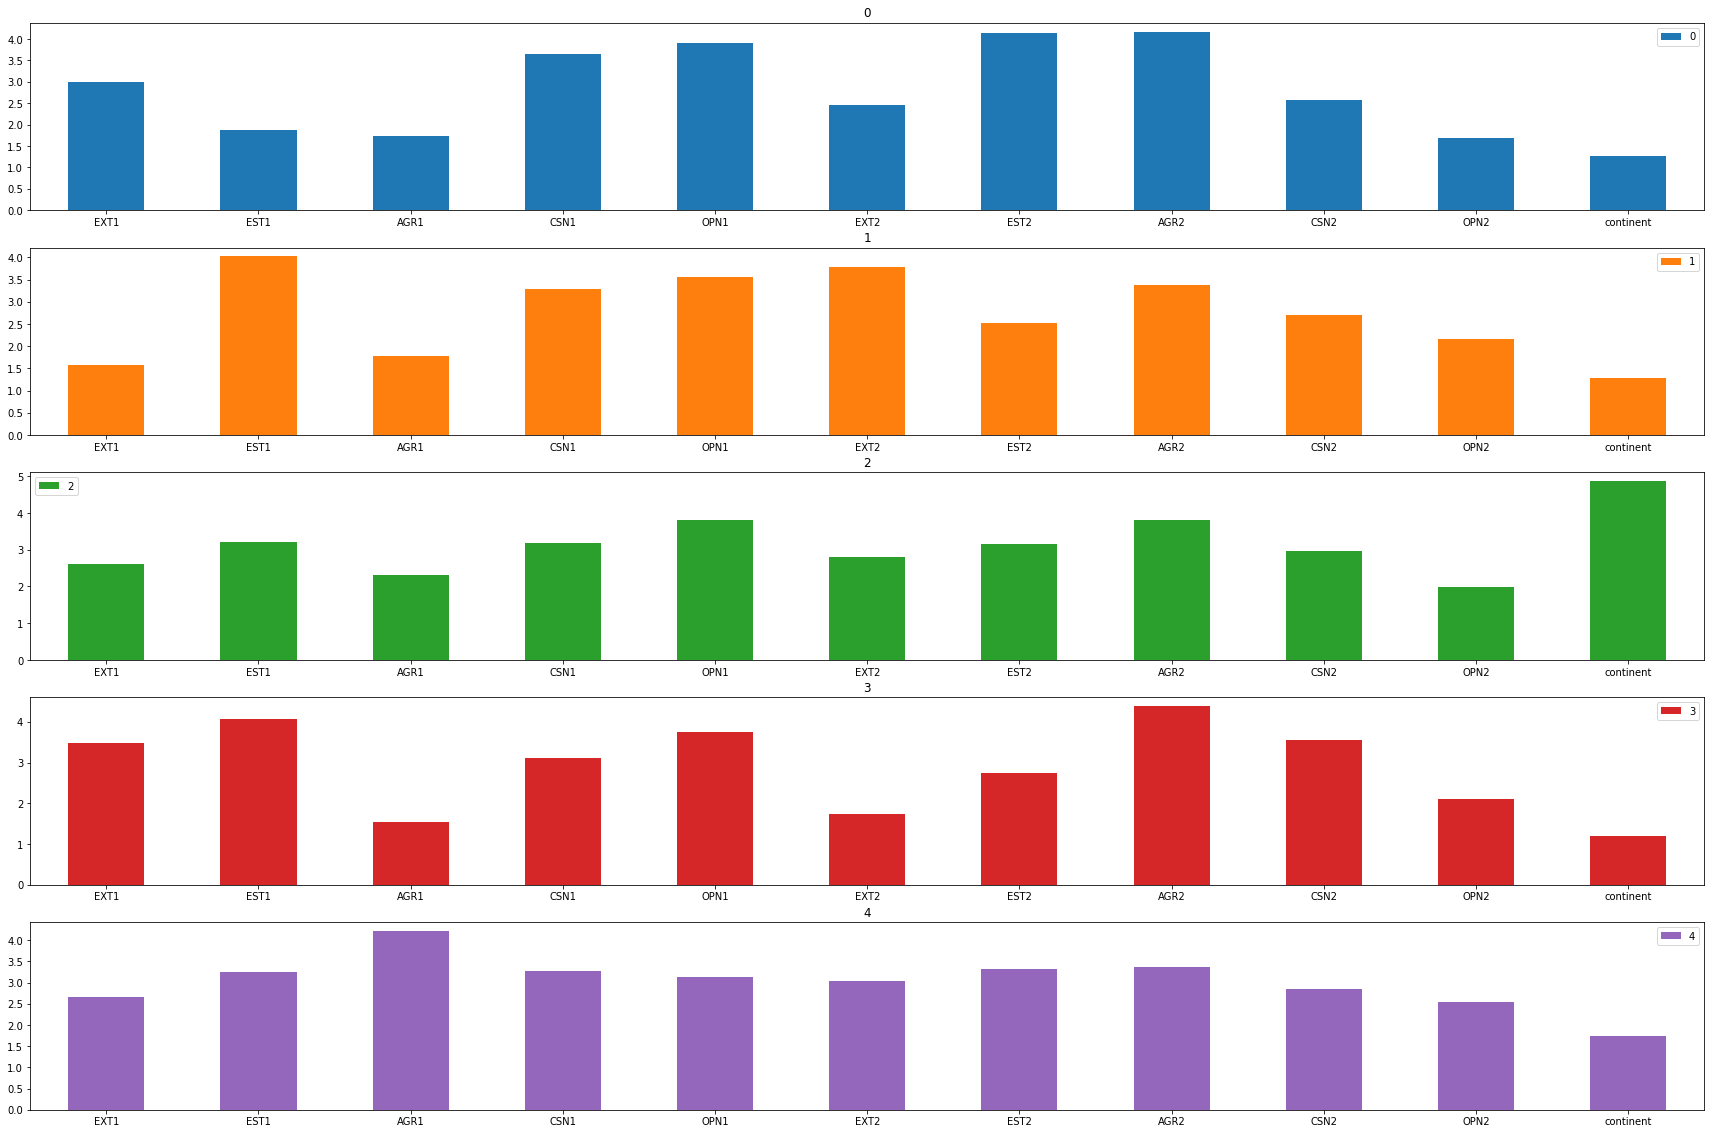

In [109]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_x)
groups = pd.DataFrame(kmeans.cluster_centers_, columns = scaled_x.columns)
groups = groups.transpose()
groups.plot.bar(subplots = True, figsize = (30, 20), sharex =False ,rot = 0 )




In [110]:
#scaled_x['continent'] = data['continent']
scaled_x['Cluster'] =kmeans.labels_


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
scaled_x.dropna(inplace=True)
y = y.loc[scaled_x.index]
print(y.shape)
print(scaled_x.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(998322,)
(998322, 12)


In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b'],
 'dcoord': [[0.0, 1.8347763566989745, 1.8347763566989745, 0.0],
  [0.0, 0.755191822098509, 0.755191822098509, 0.0],
  [0.0, 0.9692201992230595, 0.9692201992230595, 0.755191822098509],
  [0.0, 0.9887549808812794, 0.9887549808812794, 0.9692201992230595],
  [0.0, 1.2736258093877664, 1.2736258093877664, 0.0],
  [0.9887549808812794,
   1.3947095376342933,
   1.3947095376342933,
   1.2736258093877664],
  [0.0, 1.6432963230465927, 1.6432963230465927, 1.3947095376342933],
  [0.0, 1.9310950116483085, 1.9310950116483085, 1.6432963230465927],
  [1.8347763566989745,
   2.063911486916458,
   2.063911486916458,
   1.9310950116483085],
  [0.0, 3.250884859594127, 3.250884859594127, 2.063911486916458]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [63.75, 63.75, 100.0, 100.0],
  [45.0, 45.0, 81.875, 81.875],
  [35.0, 35.0, 63.437

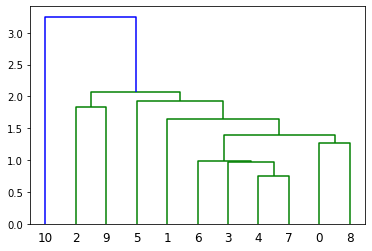

In [113]:
matriz_de_distancia = linkage(groups)
dendrogram(matriz_de_distancia)

In [114]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [115]:
#visualizacao = tsne.fit_transform(scaled_x)
#visualizacao

In [116]:
#sns.set(rc={'figure.figsize': (13, 13)})
#sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue =kmeans.labels_, palette=sns.color_palette('Set1', 4) )

In [117]:
#x['continent'] = pd.to_numeric(x['continent'])
scaled_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998322 entries, 0 to 1015340
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   EXT1       998322 non-null  float64
 1   EST1       998322 non-null  float64
 2   AGR1       998322 non-null  float64
 3   CSN1       998322 non-null  float64
 4   OPN1       998322 non-null  float64
 5   EXT2       998322 non-null  float64
 6   EST2       998322 non-null  float64
 7   AGR2       998322 non-null  float64
 8   CSN2       998322 non-null  float64
 9   OPN2       998322 non-null  float64
 10  continent  998322 non-null  object 
 11  Cluster    998322 non-null  int32  
dtypes: float64(10), int32(1), object(1)
memory usage: 95.2+ MB


In [118]:
corr = scaled_x.corr()
corr

,EXT1,EST1,AGR1,CSN1,OPN1,EXT2,EST2,AGR2,CSN2,OPN2,Cluster
EXT1,1.000000,-0.085302,-0.012862,0.037498,0.032843,-0.439895,0.138769,0.261192,0.050101,0.002307,0.142683
EST1,-0.085302,1.000000,-0.027084,-0.041146,-0.029791,0.063338,-0.453744,-0.002257,0.092965,0.172291,0.292217
AGR1,-0.012862,-0.027084,1.000000,-0.011823,-0.076460,0.123779,0.047543,-0.229835,-0.006039,0.105985,0.445491
CSN1,0.037498,-0.041146,-0.011823,1.000000,0.119252,0.017421,0.064149,0.072890,-0.268112,-0.036306,-0.110718
OPN1,0.032843,-0.029791,-0.076460,0.119252,1.000000,-0.026662,0.037314,0.100027,0.084830,-0.299376,-0.146483
EXT2,-0.439895,0.063338,0.123779,0.017421,-0.026662,1.000000,0.000556,-0.251033,-0.039492,0.055698,-0.109881
EST2,0.138769,-0.453744,0.047543,0.064149,0.037314,0.000556,1.000000,0.104126,0.027810,-0.049785,-0.163369
AGR2,0.261192,-0.002257,-0.229835,0.072890,0.100027,-0.251033,0.104126,1.000000,0.088605,-0.036920,-0.057170
CSN2,0.050101,0.092965,-0.006039,-0.268112,0.084830,-0.039492,0.027810,0.088605,1.000000,0.005472,0.147209
OPN2,0.002307,0.172291,0.105985,-0.036306,-0.299376,0.055698,-0.049785,-0.036920,0.005472,1.000000,0.193891


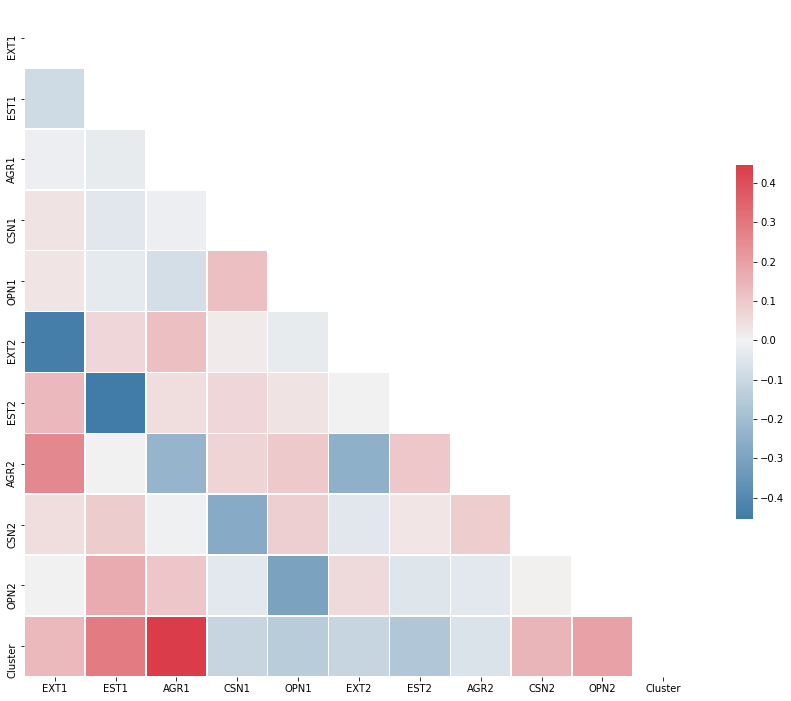

In [119]:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(15, 13))
  cmap = sns.diverging_palette(240, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [120]:
#raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
#                                                         test_size = 0.25,
#                                                         stratify = y)
#
#print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))
#
#modelo = TPOTClassifier(verbosity = 2, generations=5, n_jobs=-1, config_dict="TPOT light")
#modelo.fit(raw_treino_x, treino_y)

In [121]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(scaled_x, y,
                                                         test_size = 1/3)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(raw_treino_x, treino_y)
previsoes_SVC = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

    
dot_data = export_graphviz(modelo, out_file=None,  feature_names = scaled_x.columns, filled=True, rounded=True, class_names=list_classes )
grafico = graphviz.Source(dot_data)

Treinaremos com 665548 elementos e testaremos com 332774 elementos
A acurácia foi 69.64%


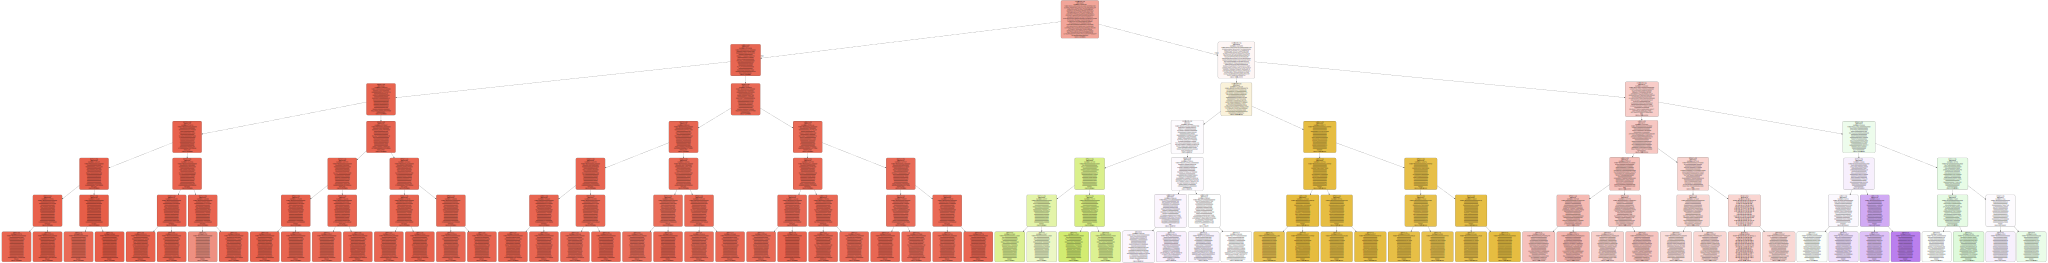

In [122]:
grafico

In [123]:
pred = modelo.predict([[5,5,5,5,5,5,5,5,5,5,2, 4]])
print("Previsão: "+ pred[0])

Previsão: Brazil


In [124]:
centr = kmeans.predict([[1,1,1,1,1,1,1,1,1,1,1]])
print("Centroide: "+ str(centr[0]))

Centroide: 1


In [125]:
import pickle

In [126]:
output = open('modelo_DecisionTreeClassifier_64', 'wb')
pickle.dump(modelo, output)
output.close()

In [127]:
output = open('modelo_kmeans_64', 'wb')
pickle.dump(kmeans, output)
output.close()